In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("movies_metadata.csv")

In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.shape

(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [7]:
# Drop columns with too many missing values
df = df.drop(columns=['belongs_to_collection', 'homepage'])

# Fill missing values
# For simplicity, we'll fill 'overview' with an empty string
df['overview'] = df['overview'].fillna('')

In [8]:
# Converting columns 'budget', 'popularity', and 'revenue' to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [9]:
import ast

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract all genres
df['genre_names'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

print(df['genre_names'])


0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genre_names, Length: 45466, dtype: object


In [10]:
# Flatten the list of genre names
all_genres = [genre for genres_list in df['genre_names'] for genre in genres_list]

# Count the number of occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

print(genre_counts)

Drama                                    20265
Comedy                                   13182
Thriller                                  7624
Romance                                   6735
Action                                    6596
Horror                                    4673
Crime                                     4307
Documentary                               3932
Adventure                                 3496
Science Fiction                           3049
Family                                    2770
Mystery                                   2467
Fantasy                                   2313
Animation                                 1935
Foreign                                   1622
Music                                     1598
History                                   1398
War                                       1323
Western                                   1042
TV Movie                                   767
Carousel Productions                         1
Vision View E

In [11]:
# Filter out irrelevant data that might have been wrongly included
valid_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy','Foreign',
                'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

# Keep only rows with valid genres
genre_counts = genre_counts[genre_counts.index.isin(valid_genres)]

print(genre_counts)

Drama              20265
Comedy             13182
Thriller            7624
Romance             6735
Action              6596
Horror              4673
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3049
Family              2770
Mystery             2467
Fantasy             2313
Animation           1935
Foreign             1622
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             767
Name: count, dtype: int64


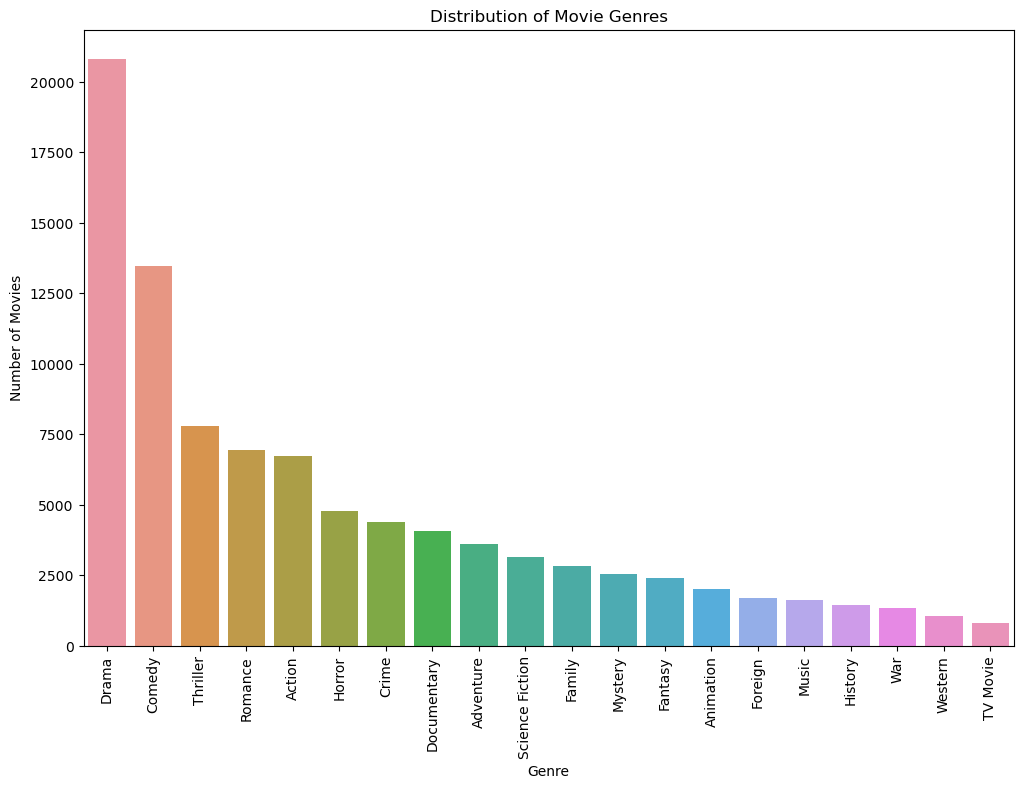

In [89]:
# Create a DataFrame for the count plot
genre_df = pd.DataFrame({'Genre': all_genres})

# Plotting the count plot of movie genres
plt.figure(figsize=(12, 8))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


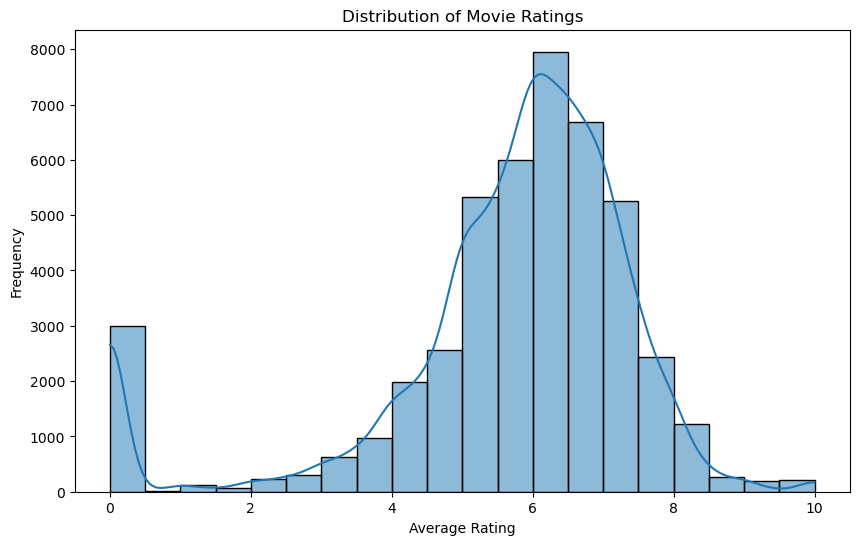

In [13]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


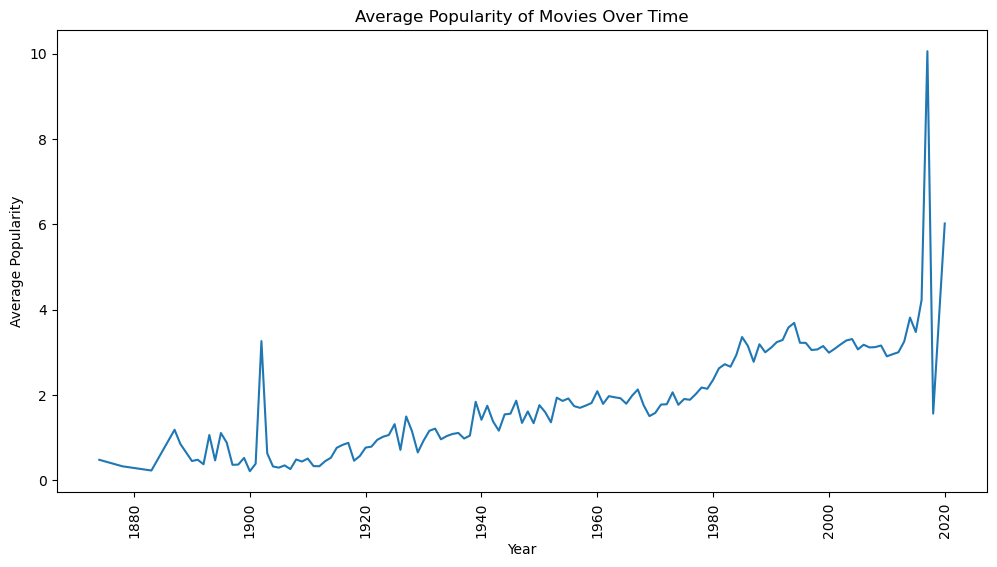

In [95]:
popularity_by_year = df.groupby('year')['popularity'].mean().reset_index()
popularity_by_year['year'] = pd.to_datetime(popularity_by_year['year'], format='%Y')

#Lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=popularity_by_year)
plt.title('Average Popularity of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()


## Simple Recommender

The Simple Recommender provides generalized movie suggestions based on popularity and, occasionally, genre. It assumes that highly rated and popular films are more likely to appeal to a broad audience. This approach does not personalize recommendations but rather provides generalized suggestions to all users. The implementation involves sorting movies by their popularity and ratings, and optionally filtering by genre to show the top-rated films. 

I use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

   Weighted Rating (WR) =  (v/(v+m)).R + (m/(v+m)).C     where,

   **v** is the number of votes for the movie ,
   **m** is the minimum votes required to be listed in the chart , 
    **R** is the average rating of the movie , 
    **C** is the mean vote across the whole report

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [14]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [15]:
m = vote_counts.quantile(0.95)
m

434.0

In [16]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [17]:
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

Therefore, to  qualify to be considered for the chart, we can see that a movie has to have at least 434 votes on TMDB. 
We also see that the average rating for a movie on TMDB is 5.244 on a scale of 10. 
2274 Movies qualify to be on our chart.

In [18]:
def rating_weightage(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [19]:
qualified['wr'] = qualified.apply(rating_weightage, axis=1)

In [20]:
qualified = qualified.sort_values('wr', ascending=False).head(250)

### Top Movies

In [21]:
qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",7.917588
12481,The Dark Knight,2008,12269,8,123.167259,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",7.905871
22879,Interstellar,2014,11187,8,32.213481,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",7.897107
2843,Fight Club,1999,9678,8,63.869599,"[{'id': 18, 'name': 'Drama'}]",7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.871787
292,Pulp Fiction,1994,8670,8,140.950236,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",7.868660
314,The Shawshank Redemption,1994,8358,8,51.645403,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.861927
351,Forrest Gump,1994,8147,8,48.307194,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",7.851924


 We see that three Christopher Nolan Films, Inception, The Dark Knight and Interstellar occur at the very top of our chart. 

 The chart also indicates a strong bias of TMDB Users towards particular genres and directors. 

Lets construct a function that builds charts for particular genres

In [22]:
s = df['genres'].explode().dropna()
s = s.apply(lambda x: x['name'] if isinstance(x, dict) else None)
s.name = 'genre'

# Join back to the original DataFrame
gen_df = df.drop('genres', axis=1).join(s) 

In [23]:
print(gen_df.columns)

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'genre_names', 'year', 'genre'],
      dtype='object')


In [24]:
print(gen_df['genre'].unique())  # Check unique genres in gen_df

['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'History' 'Science Fiction'
 'Mystery' 'War' 'Foreign' nan 'Music' 'Documentary' 'Western' 'TV Movie'
 'Carousel Productions' 'Vision View Entertainment'
 'Telescene Film Group Productions' 'Aniplex' 'GoHands' 'BROSTA TV'
 'Mardock Scramble Production Committee' 'Sentai Filmworks'
 'Odyssey Media' 'Pulser Productions' 'Rogue State' 'The Cartel']


In [25]:
def build_chart(genre, percentile=0.85):
    df = gen_df[gen_df['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

### Top Thriller Movies

In [26]:
build_chart('Thriller').head(10)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.956460
12481,The Dark Knight,2008,12269,8,123.167259,7.950165
292,Pulp Fiction,1994,8670,8,140.950236,7.929996
46,Se7en,1995,5915,8,18.457430,7.898573
24860,The Imitation Game,2014,5895,8,31.595940,7.898242
586,The Silence of the Lambs,1991,4549,8,4.307222,7.869538
11354,The Prestige,2006,4510,8,16.945560,7.868463
289,Leon: The Professional,1994,4293,8,20.477329,7.862142
4099,Memento,2000,4168,8,15.450789,7.858217
1213,The Shining,1980,3890,8,19.611589,7.848633


### Top Romance Movies

In [27]:
build_chart('Romance').head(10)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,8.565285
351,Forrest Gump,1994,8147,8,48.307194,7.971357
876,Vertigo,1958,1162,8,18.208220,7.811667
40251,Your Name.,2016,1030,8,34.461252,7.789489
883,Some Like It Hot,1959,835,8,11.845107,7.745154
1132,Cinema Paradiso,1988,834,8,14.177005,7.744878
19901,Paperman,2012,734,8,7.198633,7.713951
37863,Sing Street,2016,669,8,10.672862,7.689483
882,The Apartment,1960,498,8,11.994281,7.599317
38718,The Handmaiden,2016,453,8,16.727405,7.566166


### Top Movies by Popularity

In [28]:
qualified['popularity'] = pd.to_numeric(qualified['popularity'], errors='coerce')

In [29]:
qualified.dropna(subset=['popularity'], inplace=True)

In [30]:
# Popularity-based recommender
popular_movies = qualified[['title', 'popularity']].sort_values(by='popularity', ascending=False)

In [31]:
popular_movies.head(15)

,title,popularity
33356,Wonder Woman,294.337037
24455,Big Hero 6,213.849907
26564,Deadpool,187.860492
26566,Guardians of the Galaxy Vol. 2,185.330992
14551,Avatar,185.070892
24351,John Wick,183.870374
23675,Gone Girl,154.801009
26567,Captain America: Civil War,145.882135
292,Pulp Fiction,140.950236
12481,The Dark Knight,123.167259


## Content-Based Recommender
The recommender system built in the previous section has limitations. It provides the same recommendations to all users, disregarding personal tastes. For example, someone who loves romantic movies like Dilwale Dulhania Le Jayenge or Kabhi Khushi Kabhi Gham might not find these movies in the top recommendations, even if they look at genre-specific charts.

To improve personalization, we'll develop a system that computes movie similarity based on metrics and suggests movies similar to those a user likes. By leveraging movie metadata, this approach, known as Content-Based Filtering, tailors recommendations to individual preferences. For instance, if a user enjoys films by Shahrukh Khan or Karan Johar, the system will highlight similar movies featuring these elements, enhancing the relevance of recommendations.

In [32]:
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [33]:
df['id'][~df['id'].str.isnumeric()]

19730    1997-08-20
29503    2012-09-29
35587    2014-01-01
Name: id, dtype: object

We can see that these rows have non-numeric values in column 'id'.

In [34]:
df = df.drop([19730, 29503, 35587])

In [35]:
df['id'] = df['id'].astype('int')

In [36]:
small_df = df[df['id'].isin(links_small)]
small_df.shape

(9099, 24)

This means that there are **9099** movies in movies_metadata dataset with the same id as links_small

#### Description Based Recommender

In [37]:
small_df['tagline'] = small_df['tagline'].fillna('')
small_df['description'] = small_df['overview'] + small_df['tagline']
small_df['description'] = small_df['description'].fillna('')

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0, stop_words='english')
tf_matrix = tf.fit_transform(small_df['description'])

In [39]:
tf_matrix.shape

(9099, 268124)

In [40]:
cosine_sim = linear_kernel(tf_matrix, tf_matrix)

In [41]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [42]:
small_df = small_df.reset_index()
titles = small_df['title']
indices = pd.Series(small_df.index, index=small_df['title'])

In [43]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = cosine_sim[idx]
    movie_indices = sim_scores.argsort()[::-1][1:31]
    return titles.iloc[movie_indices]


In [44]:
get_recommendations('John Wick').head(10)

8616                                        The Dog
8858                                  Welcome to Me
3859          Morgan: A Suitable Case for Treatment
5235                          School for Scoundrels
2867                                        Screwed
8538                                      Wake Wood
8348                             Revenge for Jolly!
5290                                       The Trip
2922                                          Benji
210     Far from Home: The Adventures of Yellow Dog
Name: title, dtype: object

In [45]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

When we pass **"The Dark Knight"** as title , it identify that it is a _Batman film_ and subsequently recommend other Batman films as its top recommendations.

#### Metadata Based Recommender

In [46]:
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')

In [47]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [48]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [49]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
df['id'] = df['id'].astype('int')

In [50]:
df = df.merge(credits, on='id')
df = df.merge(keywords, on='id')

In [51]:
small_df = df[df['id'].isin(links_small)]
small_df.shape

(9219, 27)

We will refine our dataframe by focusing on specific features:

**Crew**: Only include the director, as other roles are less impactful for the movie's feel.

**Cast**: Select the top 3 major actors from the credits, since lesser-known actors and minor roles don't significantly influence opinions.

This will streamline our data to emphasize key elements.

In [52]:
from ast import literal_eval

small_df['cast'] = small_df['cast'].apply(literal_eval)
small_df['crew'] = small_df['crew'].apply(literal_eval)
small_df['keywords'] = small_df['keywords'].apply(literal_eval)
small_df['cast_size'] = small_df['cast'].apply(lambda x: len(x))
small_df['crew_size'] = small_df['crew'].apply(lambda x: len(x))

In [53]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [54]:
small_df['director'] = small_df['crew'].apply(get_director)

In [55]:
small_df['cast'] = small_df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
small_df['cast'] = small_df['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [56]:
small_df['keywords'] = small_df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [57]:
# Converting each cast member's name to lowercase & Removing spaces from each cast member's name
small_df['cast'] = small_df['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [58]:
# Normalize 'director' names by converting to lowercase, removing spaces, and duplicating each name three times

small_df['director'] = small_df['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
small_df['director'] = small_df['director'].apply(lambda x: [x,x, x])

In [59]:
s = small_df.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [60]:
s = s.value_counts()
s

keyword
independent film         610
woman director           550
murder                   399
duringcreditsstinger     327
based on novel           318
                        ... 
summer cottage             1
kitchen sink realism       1
motion picture studio      1
driving in the rain        1
toyko                      1
Name: count, Length: 12940, dtype: int64

In [61]:
# Filtering out keywords that occur only once
s = s[s > 1]

The **SnowballStemmer** can be used for stemming, which reduces words to their root form. This helps in normalizing words for text processing tasks by removing suffixes and reducing variations (e.g., "running" to "run"). It's useful for improving the effectiveness of text analysis and natural language processing by treating related words uniformly.

In [62]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [63]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [64]:
#Process keywords by filtering, stemming, and normalizing text

small_df['keywords'] = small_df['keywords'].apply(filter_keywords)
small_df['keywords'] = small_df['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
small_df['keywords'] = small_df['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [65]:
# Combine the features
small_df['feature_comb'] = small_df['keywords'] + small_df['cast'] + small_df['director'] + small_df['genres']

# Convert all elements in the combined lists to strings and join them
small_df['feature_comb'] = small_df['feature_comb'].apply(lambda x: ' '.join(str(i) for i in x))

In [66]:
# Create a CountVectorizer to convert text data into a matrix of token counts
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0, stop_words='english')
count_matrix = count.fit_transform(small_df['feature_comb'])

In [67]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [68]:
small_df = small_df.reset_index()
titles = small_df['title']
indices = pd.Series(small_df.index, index=small_df['title'])

We’ll use the previously defined get_recommendations function to get movie suggestions. Given the updated cosine similarity scores, the recommendations for "The Dark Knight" should now differ and likely improve. Let’s run the function again to see the new results.

In [69]:
get_recommendations('The Dark Knight').head(10)

7991      The Dark Knight Rises
6186              Batman Begins
2077                  Following
8899    Kidnapping Mr. Heineken
6609                Harsh Times
3631            An Innocent Man
6587               The Prestige
7872                     Takers
3054                White Sands
5346                     Harper
Name: title, dtype: object

The recommendations now highlight other Christopher Nolan films, reflecting the increased emphasis on the director feature. Notably, movies like _Batman Begins_, _The Prestige_, and _The Dark Knight Rises_ appeared in the top recommendations, which aligns well with my preferences.

In [70]:
get_recommendations('The Terminator').head(10)

522             Terminator 2: Judgment Day
962                                 Aliens
910                              The Abyss
8822                    Terminator Genisys
4711    Terminator 3: Rise of the Machines
344                              True Lies
7444                                Avatar
7527                              Repo Men
4568                              The Core
3603                              Watchers
Name: title, dtype: object

Our recommendation system currently suggests movies without considering their ratings or popularity.

To improve this, we’ll refine the system to filter out poorly rated movies. First, we’ll identify the top 25 movies based on similarity scores and determine the vote count at the 60th percentile. We’ll use this vote count as the threshold 
𝑚
m and calculate each movie's weighted rating using IMDb's formula, as we did with the Simple Recommender.

In [71]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = small_df.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(rating_weightage, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [72]:
improved_recommendations('The Dark Knight')

,title,vote_count,vote_average,year,wr
7608,Inception,14075,8,2010,7.917588
6587,The Prestige,4510,8,2006,7.758148
7991,The Dark Knight Rises,9263,7,2012,6.921448
6186,Batman Begins,7511,7,2005,6.904127
2077,Following,363,7,1998,6.044272
7223,The Baader Meinhof Complex,157,7,2008,5.711142
7872,Takers,399,6,2010,5.606585
6960,Street Kings,369,6,2008,5.591887
6609,Harsh Times,198,6,2005,5.481464
8899,Kidnapping Mr. Heineken,193,5,2015,5.169514


In [73]:
improved_recommendations('The Terminator')

,title,vote_count,vote_average,year,wr
7444,Avatar,12114,7,2009,6.939296
522,Terminator 2: Judgment Day,4274,7,1991,6.838208
962,Aliens,3282,7,1986,6.795018
910,The Abyss,822,7,1989,6.393539
8385,Elysium,3510,6,2013,5.916908
344,True Lies,1138,6,1994,5.791530
7380,Surrogates,1219,5,2009,5.064298
4711,Terminator 3: Rise of the Machines,2177,5,2003,5.040707
7256,Terminator Salvation,2496,5,2009,5.036275
8822,Terminator Genisys,3677,5,2015,5.025854


## Collaborative Filtering

Collaborative filtering is a method used to make recommendations by looking at what similar users liked or rated highly. It finds patterns in user behavior to suggest items you might enjoy, without needing detailed information about the items themselves.

Here , we will create a recommendation system by comparing movies based on user ratings. We will be building a table of user ratings for movies, findind similarities between movies, and suggesting similar ones to users based on their past ratings. This approach helps recommend movies similar to those a user likes.

In [74]:
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [75]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


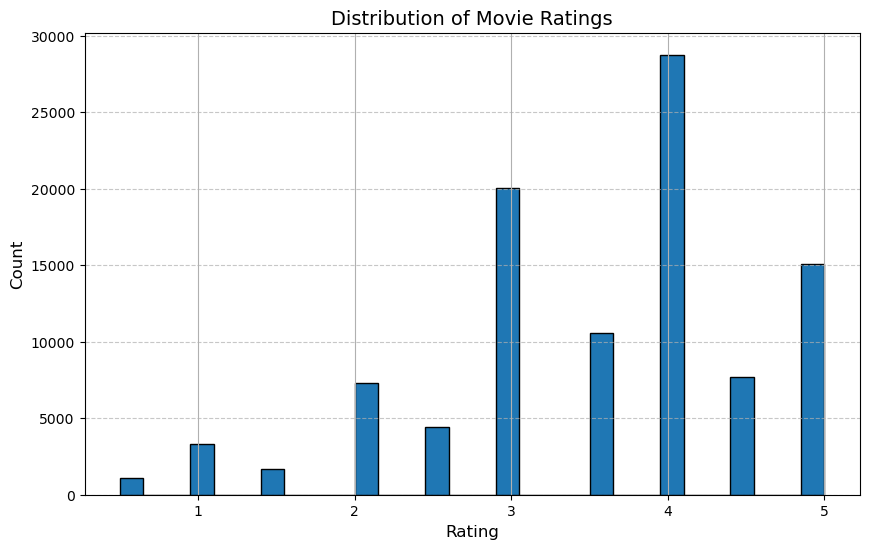

In [78]:
# Histogram of ratings
plt.figure(figsize=(10, 6))
ratings['rating'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Movie Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [80]:
print(ratings['movieId'].dtype)
print(df['id'].dtype)

int64
int32


In [81]:
df['id'] = pd.to_numeric(df['id'], errors='coerce')  
df = df.dropna(subset=['id'])

In [82]:
df['id'] = df['id'].astype('int64')

In [83]:
ratings['movieId'] = ratings['movieId'].astype(int)
df['id'] = df['id'].astype(int)

In [84]:
# Merge ratings with movies metadata to get movie titles
ratings = ratings.merge(df[['id', 'title']], left_on='movieId', right_on='id', how='left')

# Create a user-item matrix
user_item_matrix = ratings.pivot_table(index='userId', columns='title', values='rating')
user_item_matrix = user_item_matrix.fillna(0)


In [85]:
# Compute the cosine similarity between movies
movie_similarity = cosine_similarity(user_item_matrix.T)

# Create a DataFrame to hold movie similarity scores
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)


In [86]:
def get_recommendations(movie_title, top_n=10):
    if movie_title not in movie_similarity_df.columns:
        return f"Movie '{movie_title}' not found."
    
    # Get the similar movies and their similarity scores
    similar_scores = movie_similarity_df[movie_title]
    
    # Sort the movies by similarity scores and get the top_n + 1 (excluding the movie itself)
    similar_movies = similar_scores.sort_values(ascending=False).head(top_n + 1)
    
    # Remove the movie itself from the list
    similar_movies = similar_movies.index[1:]
    
    # Create a DataFrame with movie titles and similarity scores
    recommendations_df = pd.DataFrame({
        'Movie Title': similar_movies,
        'Similarity Score': similar_scores[similar_movies].values
    })
    
    return recommendations_df

In [87]:
get_recommendations('The Dark Knight', top_n=10)

,Movie Title,Similarity Score
0,Wild Wild West,0.501456
1,Prom Night,0.499431
2,The Contender,0.476331
3,It Happened at the World's Fair,0.476331
4,My Best Fiend,0.476331
5,The Shadow,0.476331
6,Shock Treatment,0.476331
7,Diplomatic Courier,0.476331
8,The Ice Harvest,0.476331
9,Pan's Labyrinth,0.476331


### **Conclusion**
Here , three distinct recommendation engines using various approaches and algorithms were developed. These engines are:

**Simple Recommender**: This system leveraged the overall TMDB vote count and vote averages to create top movie charts, both in general and for specific genres. The IMDB Weighted Rating System was employed to compute the ratings, which were then used for sorting the movies.

**Content-Based Recommender**: Two content-based models were implemented. The first model used movie overviews and taglines to generate recommendations, while the second utilized metadata such as cast, crew, genres, and keywords to predict preferences. Additionally, a filtering mechanism was introduced to prioritize movies with higher vote counts and ratings, enhancing the recommendation quality.

**Collaborative Filtering**: This model was developed using cosine similarity on a user-item matrix created from the rating data. By calculating the similarity between movies based on user ratings, the system could recommend similar movies to users based on their past preferences. This approach provides personalized recommendations and leverages the relationship between user behaviors and movie ratings.

Overall, these diverse approaches offer a comprehensive framework for movie recommendation, addressing various aspects of user preferences and available data.